# OCS Qubit

## To Do:


1. Parameter sweep of OCS qubit to get required $\frac{E_j}{E_c} \approx 20$ ⌛️ ->

In [ ]:
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings


In [1]:
def launch_Metal_GUI():
    design = designs.DesignPlanar()

    design._chips['main']['size']['size_x'] = '5mm'
    design._chips['main']['size']['size_y'] = '5mm'

    design.variables['cpw_width'] = '10 um'
    design.variables['cpw_gap'] = '6 um'

    gui = MetalGUI(design)
    return gui, design


D:\Users\lfl\Anaconda3\envs\qiskit-metal\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
if __name__ == "__main__":
    

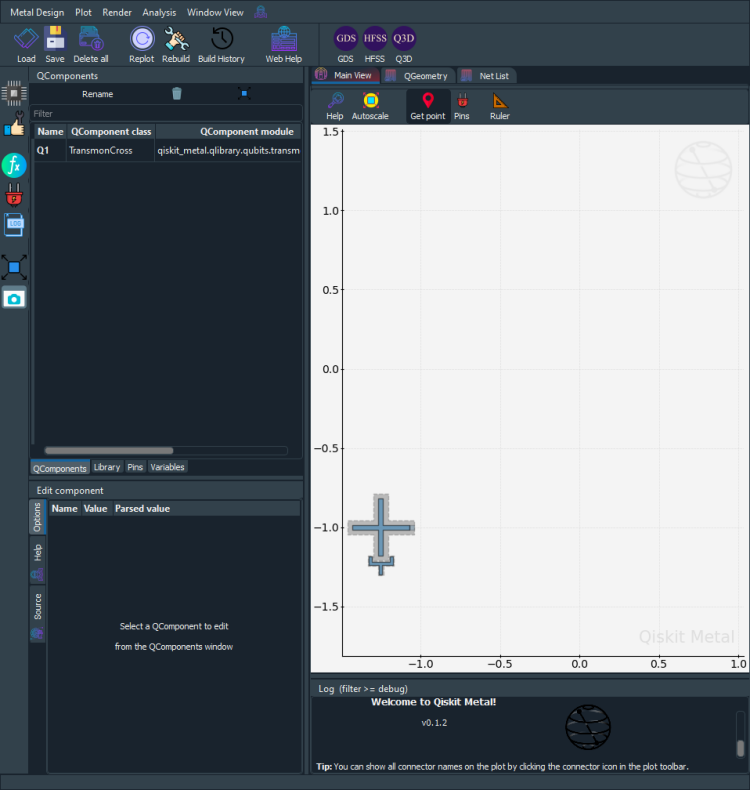

In [3]:
#Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

########## OCS QUBUIT ########
options_d = dict(
    cross_width = '30um',
    cross_length = '180um',
    cross_gap = '30um',
    chip='main',
    connection_pads=dict(
        ground_pin  = dict(connector_location = '0', connector_type = '0', claw_width = '19.1um', claw_length = '35.9um', 
                           ground_spacing = '5um')
    )
)

q_d = TransmonCross(design, 'Q1', options = dict(
    pos_x='-1250um', pos_y='-1mm', orientation = '90', **options_d))

######### REBUILD ##########

gui.rebuild()
gui.autoscale()
gui.screenshot()

# EPR Simulation:

In [4]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_qb = EPRanalysis(design, "hfss")

In [5]:
hfss = eig_qb.sim.renderer

In [6]:
hfss.start()

INFO 04:22PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:22PM [load_ansys_project]: 	Opened Ansys App
INFO 04:22PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 04:22PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/HFSS/
	Project:   Project42
INFO 04:22PM [connect_design]: No active design found (or error getting active design).
INFO 04:22PM [connect]: 	 Connected to project "Project42". No design detected


True

In [7]:
hfss.activate_ansys_design("ocs_test", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

04:22PM 55s WARNING [activate_ansys_design]: The design_name=ocs_test was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 04:22PM [connect_design]: 	Opened active design
	Design:    ocs_test [Solution type: Eigenmode]
WARNING 04:22PM [connect_setup]: 	No design setup detected.
WARNING 04:22PM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:22PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [8]:
hfss.render_design(['Q1'], [])

In [9]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')

setup.analyze()

INFO 04:23PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



In [11]:
%matplotlib inline

  df = pd.read_csv(io.StringIO(text2[3].strip()),

04:27PM 37s INFO [get_f_convergence]: Saved convergences to C:\Users\lfl\LL_OCS_Qubit\hfss_eig_f_convergence.csv


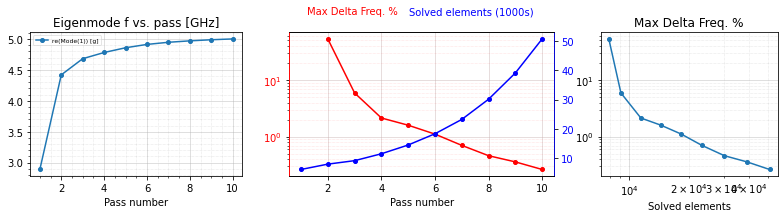

In [12]:
eig_qb.sim.convergence_t, eig_qb.sim.convergence_f, _ = hfss.get_convergences()
eig_qb.sim.plot_convergences()

In [ ]:
import pandas as pd

In [31]:
df1 = eig_qb.get_frequencies()

Design "ocs_test" info:
	# eigenmodes    1
	# variations    1
Design "ocs_test" info:
	# eigenmodes    1
	# variations    1


In [38]:
qubit_freq  = df1["Freq. (GHz)"][0]
print(f"qubit frequency = {qubit_freq} GHz")

qubit frequency = 5.00255225064 GHz


In [14]:
pinfo = hfss.pinfo
pinfo.junctions['jj'] = {'Lj_variable': 'Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify

In [16]:
import pyEPR as epr

In [17]:
eprd = epr.DistributedAnalysis(pinfo)

Design "ocs_test" info:
	# eigenmodes    1
	# variations    1


In [18]:
eprd.do_EPR_analysis()


Variation 0  [1/1]

  Mode 0 at 5.00 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  2.552e-25 2.585e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  df = df.drop('Unnamed: 9', 1)

  df = pd.read_csv(io.StringIO(text2[3].strip()),



		Energy fraction (Lj over Lj&Cj)= 98.06%
	jj              0.989242  (+)        0.0195468
		(U_tot_cap-U_tot_ind)/mean=1.00%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9211088376689041

ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project42\ocs_test\2022-11-16 16-30-56.npz




(WindowsPath('C:/data-pyEPR/Project42/ocs_test/2022-11-16 16-30-56.npz'),
 ['0'])

In [20]:
epra = epr.QuantumAnalysis(eprd.data_filename)
sim_info = epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)

WARNING 04:32PM [__init__]: <p>Error: <class 'IndexError'></p>


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.020295
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.970276

*** S (sign-bit matrix)
   s_jj
0     1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       188

*** Chi matrix ND (MHz) 
       204

*** Frequencies O1 PT (MHz)
0    4815.001121
dtype: float64

*** Frequencies ND (MHz)
0    4807.37006
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


In [43]:
from pyEPR.calcs import Convert

df = pd.DataFrame(sim_info, columns=sim_info.keys())
df

,0
Cjs,"jj 2.000000e-15 Name: 0, dtype: float64"
Ljs,"jj 1.000000e-08 Name: 0, dtype: float64"
Pm_normed,[[0.9899675506388271]]
Pm_raw,"0 0.970276 Name: jj, dtype: float64"
Q_coupling,Empty DataFrame Columns: [] Index: [0]
Qs,"0 inf Name: 0, dtype: float64"
ZPF,[[0.38920959810716205]]
_Pm_cap_norm,modes 0 0.488691 dtype: float64
_Pm_norm,modes 0 1.020295 dtype: float64
chi_ND,0 0 203.923828


In [40]:
alpha = -df["0"]["chi_O1"].values[0][0]
print(f"Anharmonicity is {alpha} MHz")

Anharmonicity is -187.55112988438202


In [42]:
E_c = -alpha
print(f"E_c is {E_c} MHz")

E_c is 187.55112988438202


In [48]:
E_j = Convert.Ej_from_Lj(10, 'nH', "GHz")
print(f"E_j is {E_j} GHz")

E_j is 16.34615128067812 GHz


In [47]:
Ej / E_c*1e3

87.15570677049448

# Scattering Simulation
<a id='simulation_scattering'></a>


In [ ]:
# This class lets us get S Y Z parameters
from qiskit_metal.analyses.simulation import ScatteringImpedanceSim
em1 = ScatteringImpedanceSim(design, "hfss")


In [ ]:
em1.setup.sweep_setup.start_ghz = 4.5
em1.setup.sweep_setup.stop_ghz = 5.5

# Change Simulation Settings
em1.setup.reuse_selected_design = False
em1.setup.reuse_setup = False
em1.setup.max_passes = 12
em1.setup.min_passes = 5
em1.setup.max_delta_s = 0.1
em1.setup.min_converged = 5
em1.setup.pct_refinement = 30
em1.setup.sweep_setup.count = 25000
em1.setup.sweep_setup.type = 'Interpolating'
# example: update multiple settings

em1.setup.vars.Lj = '10 nH'
em1.setup.vars.Cj = '4.02 fF'

em1.setup.junctions.jj.rect = 'JJ_rect_Lj_diss_rect_jj'
em1.setup.junctions.jj.line = 'JJ_Lj_diss_rect_jj_'

em1.setup


In [ ]:
q_d.options.hfss_inductance='10nH'
gui.rebuild()

In [ ]:
resistance = 50 #Ohms (Signal Path Resistance)

In [ ]:
em1.run(name="scatter_test", components=[], open_terminations=[], port_list=[('Q1', 'ground_pin', resistance)],
           jj_to_port=[('Q1', 'rect_jj', resistance, True)], box_plus_buffer = False)

In [ ]:
%matplotlib inline

In [ ]:
dataframe_scattering = em1.get_scattering(['S11'])
dataframe_admittance = em1.get_admittance(['Y11'])

df_s = dataframe_scattering[0]
df_y = dataframe_admittance[0]


def get_real_and_imag(a_ii):
    return a_ii.values.real, a_ii.values.imag

s11real, s11imag = get_real_and_imag(df_s['S11'])
y11real, y11imag = get_real_and_imag(df_y['Y11'])


dataframe_scattering[0]['Real(S11)'] = s11real
dataframe_scattering[0]['Imag(S11)'] = s11imag
dataframe_admittance[0]['Real(Y11)'] = y11real
dataframe_admittance[0]['Imag(Y11)'] = y11imag

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Reference to current axis.
magnitude = plt.figure('Real S11, Imag S21')
axis = plt.gca() # Get current axis.
dataframe_scattering[0].plot(kind = 'line', y='Real(S11)', color = 'green', ax = axis)
dataframe_scattering[0].plot(kind = 'line', y='Imag(S11)', color = 'blue', ax = axis)
plt.title(f'S-Parameter Amplitude')
plt.xlabel(f'frequency [GHZ]')
plt.ylabel(f're(S11), im(S11) Amp')
magnitude.show()

## Scattering Analysis:

In [ ]:
import sys
import numpy as np
import pyEPR.calcs
from pyEPR.calcs import Convert

sys.path.append(r'C:/Users/lfl/fitTools/')

In [ ]:
from fitTools.Resonator import *

In [ ]:
reals11 = dataframe_scattering[0]['Real(S11)']
imags11 = dataframe_scattering[0]['Imag(S11)']
freqs = np.array(list(reals11.keys())) * 1e9
I = np.array(list(reals11.values))
Q = np.array(list(imags11.values))
phase = np.angle(I+1j*Q)

In [ ]:
res = Resonator(f_data=freqs,z_data=I + 1j*Q)

In [ ]:
plt.scatter(freqs,phase,s=0.1)

In [ ]:
delay = 0.8/18e9
phase_corr = np.angle(np.exp(-2j*np.pi*delay)*(I+1j*Q))
plt.scatter(freqs,phase_corr,s=0.1)

In [ ]:
res.plotrawdata()

In [ ]:
f_c = freqs[np.argmin(np.abs(I+1j*Q))]
span = 20e6

In [ ]:
f_c

In [ ]:
res.autofit(electric_delay= 0.8/18e9,  fcrop=(f_c-span/2,f_c+span/2))

In [ ]:
res.show()

In [ ]:
def cal_Ec_from_freq(freq,Lj):
    omega = freq * 2*np.pi * 1e9
    e = 1.60217663e-19 # in coulombs
    C = 1/(Lj * 1e-9 * omega ** 2)
    h = 6.62607015 *  1e-34
    Ec = e ** 2/2/C/h/1e6 # in MHz, linear freq
    print(f'Ec = {Ec:.0f} MHz')
    return Ec

def cal_g_in_linear_freq(res,Lj, w_c = 6.2e9):
    # Lj in nH
    kappa = res.kappa
    Z_0 = 50
    omega_0 = res.f0 * 2 * np.pi
    Lj = Lj*1e-9
    e = 1.60217663e-19 # in coulombs
    hbar = 1.05457182e-34 # in m^2*kg/s
    C_c = np.sqrt(kappa / (Lj*Z_0)) * (1/omega_0**2)
    g = C_c/(1/(Lj * omega_0**2)) * np.sqrt(Z_0*e**2/(np.pi*hbar)) *w_c/1e6
    print(f'g/2pi = {g:.1f} MHz')
    return g


def cal_gamma_in_linear_freq(res):
    gamma = res.f0/res.Qi/1e6
    print(f'gamma/2pi = {gamma:.1f} MHz')
    return gamma

def print_design_parameters(options):
    keys1 = ['cross_width','cross_length','cross_gap']
    keys2 = ['finger_count','finger_length','cap_gap','cap_gap_ground','cap_width']
    keys3 = ['termination_finger_count', 'termination_finger_length','termination_cap_gap','termination_cap_gap_ground','termination_cap_width']
    keys4 = ['hfss_inductance']
    params = [key + ' = ' + "'"+ str(value) + "'" for key,value in options.items() if key in keys1 + keys2 +keys3 + keys4] 
    print(',\n'.join(params)+',')
    
def print_simulated_results(res, Lj):
    print(f'f = {res.f0/1e9:.2f} GHz')
    cal_Ec_from_freq(res.f0/1e9,Lj)
    cal_g_in_linear_freq(res,Lj)
    cal_gamma_in_linear_freq(res) 

def get_anharmonicity(Ec):
    print(f"E_c = {Ec} MHz")
    a = 2*np.pi*(-Ec)
    print(f"Anharmonicity = {a} MHz")
    return 

In [ ]:
f_c/1e9

In [ ]:
Lj = float(q_d.options['hfss_inductance'][:-2])
Ej = Convert.Ej_from_Lj(Lj, 'nH', "GHz")
#Ec = cal_Ec_from_freq(res.f0/1e9,Lj)
Ec = cal_Ec_from_freq(f_c/1e9,Lj)

print(f"Ej = {Ej} GHz")
#print_simulated_results(res,Lj)
print(f"\nEj/Ec = {Ej/Ec*1e3}")


In [ ]:
print_design_parameters(q_d.options)

![alpha](anharmonicity.jpg)

In [ ]:
get_anharmonicity(Ec)

# LOM Simulation

In [ ]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [ ]:
q3d = c1.sim.renderer

In [ ]:
q3d.start()

In [ ]:
q3d.activate_ansys_design("test1", 'capacitive')  # use new_ansys_design() to force creation of a blank design

In [ ]:
q3d.clean_active_design()


In [ ]:
q3d.render_design(['Q1'], [('Q1','ground_pin')],box_plus_buffer=False)

In [ ]:
q3d.analyze_setup("Setup")

In [ ]:
q3d.save_screenshot()

In [ ]:
c1.sim.capacitance_matrix, c1.sim.units = q3d.get_capacitance_matrix()
c1.sim.capacitance_all_passes, _ = q3d.get_capacitance_all_passes()
c1.sim.capacitance_matrix

In [ ]:
q3d.stop()

## LOM Analysis

In [ ]:
c1.setup.junctions=Dict(Lj=10, Cj=2)
c1.setup.freq_readout = 6.0
c1.setup.freq_bus = []

c1.run_lom()

In [ ]:
c1.lumped_oscillator_all

In [ ]:
c1.plot_convergence();
c1.plot_convergence_chi()

In [ ]:
c1.sim.close()

In [ ]:
c